## やること
- 因果探索の手法であるLinGAMを実装する

In [1]:
!pip install lingam igraph pygam factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import random
import numpy as np
import pandas as pd

random.seed(1234)
np.random.seed(1234)

import graphviz
import lingam
from lingam.utils import make_dot

In [3]:
# データ生成
num_data = 200

# x2が共変量となる構造を仮定
ex1 = 2*(np.random.rand(num_data)-0.5)  # -1.0~1.0
ex2 = 2*(np.random.rand(num_data)-0.5)
ex3 = 2*(np.random.rand(num_data)-0.5)

x2 = ex2
x1 = 3*x2 + ex1
x3 = 2*x1 + 4*x2 + ex3

df = pd.DataFrame({"x1": x1, "x2": x2, "x3": x3})
df.head()

,x1,x2,x3
0,2.257272,0.958078,8.776842
1,2.531611,0.762464,8.561263
2,0.641547,0.255364,1.341902
3,3.153636,0.860973,9.322791
4,1.908691,0.449580,5.776675


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing

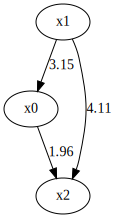

In [4]:
model = lingam.DirectLiNGAM()
model.fit(df)

# 可視化
make_dot(model.adjacency_matrix_)